## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load CSV

In [2]:
df = pd.read_csv('./datasets/balanced_har70.csv')
df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-05-21 14:39:06.159,-0.887939,-0.148438,-0.628174,-0.994629,0.184570,-0.042480,1
1,2021-03-29 15:07:45.500,-1.577148,0.088867,-0.774902,0.114502,-0.053955,-0.212891,1
2,2021-03-29 15:06:30.260,-0.667969,-0.069336,-0.396484,-0.953613,-0.177490,-0.183594,1
3,2021-03-24 15:10:11.779,-1.383057,-0.228760,-0.405273,-1.863770,0.125488,0.687988,1
4,2021-04-16 14:53:05.704,-0.671387,0.096436,-0.241211,-0.869629,-0.064941,-0.102783,1
...,...,...,...,...,...,...,...,...
26077,2021-04-16 14:40:44.904,-0.385254,0.062256,0.922607,0.071777,0.054932,-1.078125,8
26078,2021-04-16 14:39:32.865,-0.400146,0.094482,0.904541,0.076416,0.099121,-1.073730,8
26079,2021-04-15 14:32:38.419,-0.467041,0.236084,0.861328,0.110840,-0.247803,-1.078125,8
26080,2021-05-21 14:28:52.139,-0.484375,0.078125,0.732178,0.148193,-0.069092,-0.976074,8


## Dataset Partition

In [3]:
datasets = (df.iloc[:,1:-1].values, df.iloc[:,-1].values)
X, y = datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparameter's selection with Cross validation

### RandomForestClassifier

In [4]:
level_depth = np.arange(1, 25, 1)

clf1 = HalvingRandomSearchCV(RandomForestClassifier(), {'max_depth': level_depth},
cv=10, random_state=42)

clf1.fit(X_train, y_train)
print(clf1.best_estimator_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=149. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForestClassifier(max_depth=18)


In [5]:
model = RandomForestClassifier(max_depth=13).fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)

print('Clasification Report')
print(report)

Clasification Report
              precision    recall  f1-score   support

           1       0.69      0.59      0.64       754
           3       0.54      0.53      0.53       720
           4       0.69      0.76      0.72       762
           5       0.65      0.58      0.62       749
           6       0.72      0.84      0.78       754
           7       1.00      1.00      1.00       747
           8       1.00      1.00      1.00       731

    accuracy                           0.76      5217
   macro avg       0.76      0.76      0.75      5217
weighted avg       0.76      0.76      0.76      5217



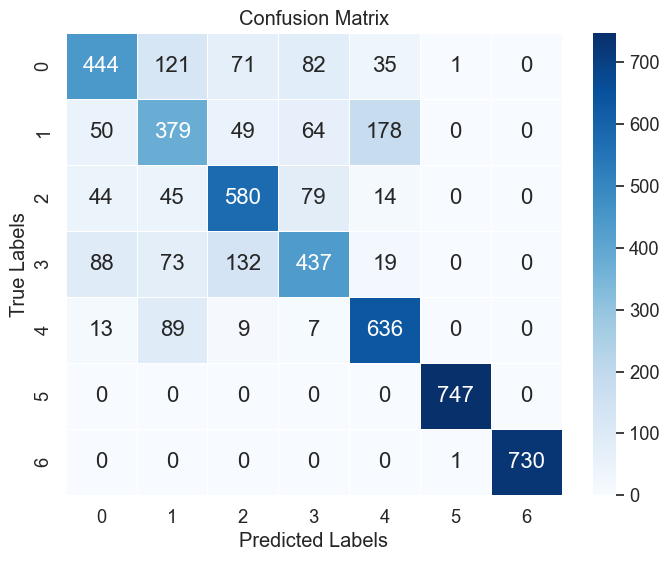

In [6]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

### Kneighbors

In [7]:
neighbors = np.arange(1, 20, 1)

clf2 = HalvingRandomSearchCV(KNeighborsClassifier(), {'n_neighbors': neighbors}, 
cv=10, random_state=0)
clf2.fit(X_train, y_train)
print(clf2.best_estimator_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 19 is smaller than n_iter=149. Running 19 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNeighborsClassifier(n_neighbors=1)


In [8]:
model1 = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

y_pred2 = model1.predict(X_test)

report2 = classification_report(y_test, y_pred2)

print('Clasification Report')
print(report2)

Clasification Report
              precision    recall  f1-score   support

           1       0.64      0.54      0.58       754
           3       0.52      0.53      0.53       720
           4       0.72      0.77      0.74       762
           5       0.67      0.62      0.64       749
           6       0.72      0.80      0.76       754
           7       0.99      1.00      1.00       747
           8       1.00      1.00      1.00       731

    accuracy                           0.75      5217
   macro avg       0.75      0.75      0.75      5217
weighted avg       0.75      0.75      0.75      5217



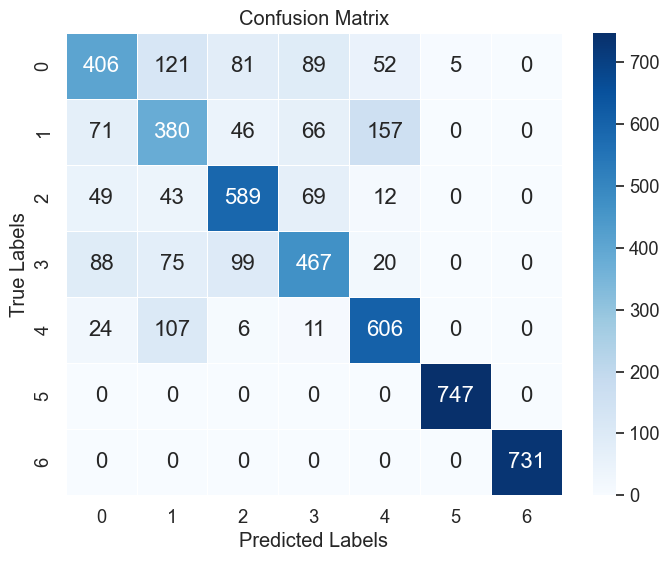

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred2)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

### ExtraTreeClassifier

In [10]:
level_depth = np.arange(1, 50, 1)

clf3 = HalvingRandomSearchCV(ExtraTreeClassifier(random_state=0), {'max_depth': level_depth},
cv=10, random_state=42)
clf3.fit(X_train, y_train)
print(clf3.best_estimator_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 49 is smaller than n_iter=149. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ExtraTreeClassifier(max_depth=23, random_state=0)


In [11]:
model2 = ExtraTreeClassifier(max_depth=23, random_state=0).fit(X_train, y_train)

y_pred3 = model2.predict(X_test)
report3 = classification_report(y_test, y_pred3)

print('Clasification Report')
print(report3)

Clasification Report
              precision    recall  f1-score   support

           1       0.52      0.41      0.46       754
           3       0.35      0.62      0.45       720
           4       0.58      0.56      0.57       762
           5       0.53      0.37      0.43       749
           6       0.62      0.50      0.56       754
           7       0.98      0.99      0.99       747
           8       0.99      0.99      0.99       731

    accuracy                           0.63      5217
   macro avg       0.65      0.64      0.64      5217
weighted avg       0.65      0.63      0.64      5217



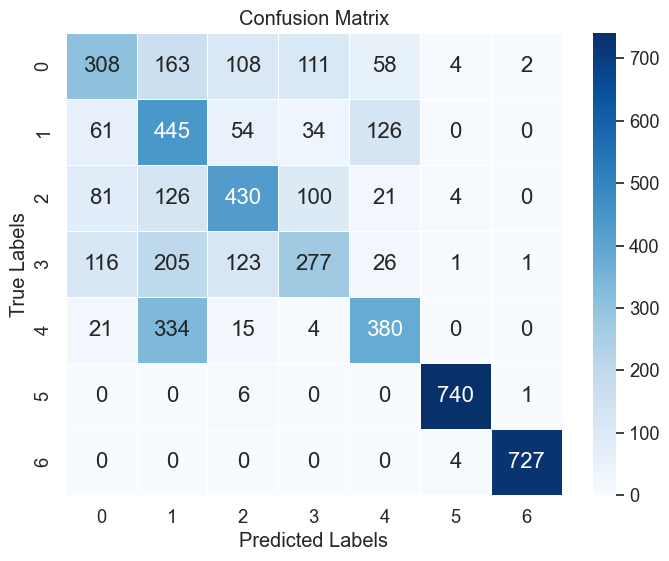

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred3)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

###  BaggingClassifier

In [13]:
n_estimators = np.arange(1, 20, 1)

clf4 = HalvingRandomSearchCV(BaggingClassifier(), {'n_estimators': n_estimators},
cv=10, random_state=0)
clf4.fit(X_train, y_train)
print(clf4.best_estimator_)


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 19 is smaller than n_iter=149. Running 19 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BaggingClassifier(n_estimators=17)


In [14]:
model3 = BaggingClassifier(n_estimators=17).fit(X_train, y_train)

y_pred4 = model3.predict(X_test)
report4 = classification_report(y_test, y_pred4)

print('Clasification Report')
print(report4)

Clasification Report
              precision    recall  f1-score   support

           1       0.64      0.59      0.62       754
           3       0.52      0.53      0.53       720
           4       0.68      0.75      0.72       762
           5       0.66      0.59      0.62       749
           6       0.76      0.80      0.78       754
           7       0.99      1.00      1.00       747
           8       1.00      1.00      1.00       731

    accuracy                           0.75      5217
   macro avg       0.75      0.75      0.75      5217
weighted avg       0.75      0.75      0.75      5217



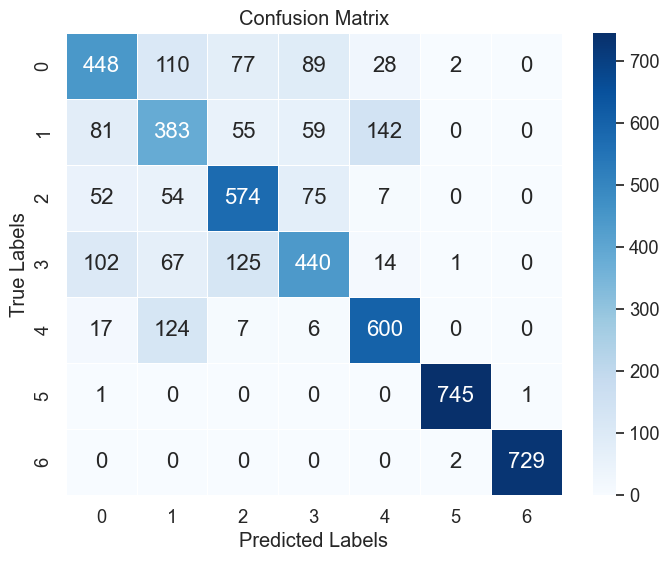

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred4)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

### MLPClassifier

In [4]:
num_layers = np.arange(1, 10, 2)
num_neurons = np.arange(5, 50, 10)
num_neurons

layers = []
for l in num_layers:
    for n in num_neurons:
        layers.append(l*[n])
    
clf5 = HalvingRandomSearchCV(MLPClassifier(max_iter=10000), {'hidden_layer_sizes': layers},
cv = 10, random_state = 0)
clf5.fit(X_train, y_train)
print(clf5.best_estimator_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 25 is smaller than n_iter=149. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[35, 35, 35, 35, 35], max_iter=10000)


In [5]:
model4 = MLPClassifier(hidden_layer_sizes=[35, 35, 35, 35, 35], max_iter=10000).fit(X_train, y_train)

y_pred5 = model4.predict(X_test)
report5 = classification_report(y_test, y_pred5)

print('Clasification Report')
print(report5)

Clasification Report
              precision    recall  f1-score   support

           1       0.63      0.57      0.60       754
           3       0.50      0.59      0.54       720
           4       0.69      0.72      0.71       762
           5       0.61      0.53      0.57       749
           6       0.77      0.77      0.77       754
           7       0.99      1.00      1.00       747
           8       1.00      1.00      1.00       731

    accuracy                           0.74      5217
   macro avg       0.74      0.74      0.74      5217
weighted avg       0.74      0.74      0.74      5217



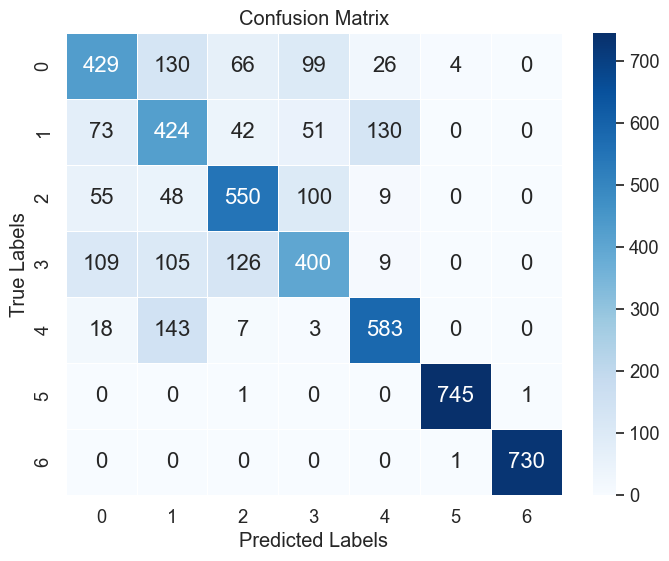

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred5)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()